## Set up and package import

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Simulate an AR process 


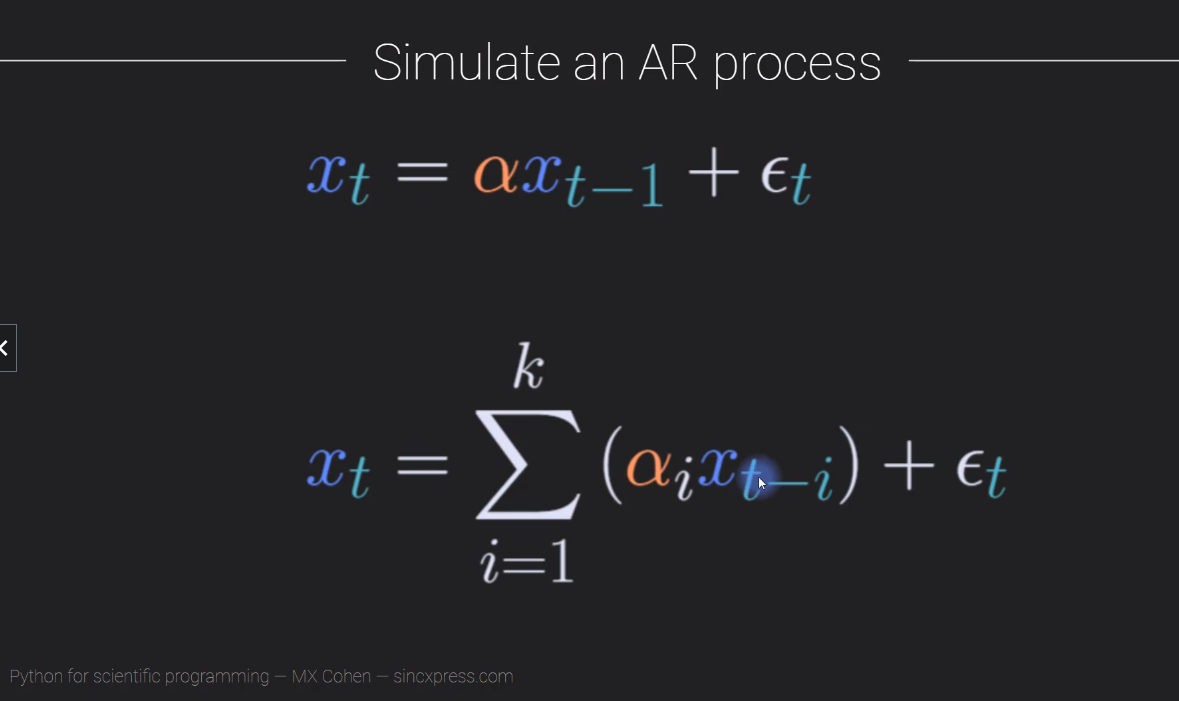 

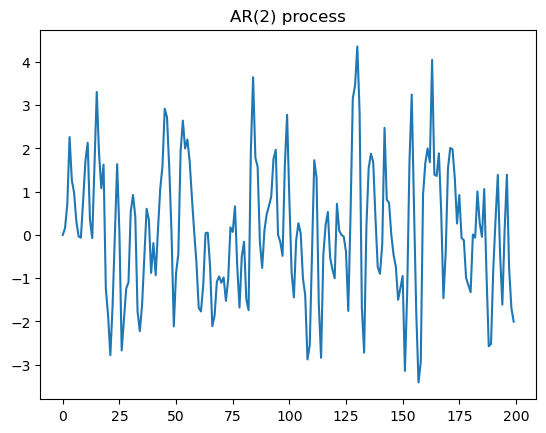

In [38]:
alpha = np.array([-.6, .9])
k = len(alpha)
n = 200
x = np.zeros(n)

for t in range(k,n):
    # this represents the second equation in the image above
    x[t] = sum(alpha*x[t-k:t]) + np.random.randn()

# add a sine wave
x += np.sin(np.linspace(0, 10*np.pi,n ))
    
plt.plot(x)
plt.xlabel('')
plt.title('AR(%s) process'%k)
plt.show()

## Coding Fourier Transform

pseudo code: 
- Loop over N points/frequencies (looping index f)
    - create complex sine wave with length of signal, and frequency of looping index
    - compute dot product between complex sine wave and signal
    
- Amplitude is magnitude of Fourier coefficients 
- Phase is angle of Fourier coeffecients

In [47]:
# define time vector
t = np.arange(n)/n


# initialize Fourier coefficients
fc = np.zeros(n, dtype=complex)

for f in range(n):
    # create complex sine wave
    csw = np.exp(-1j*2*np.pi*f*t)
    
    # calc dot product with the signal
    fc[f] = np.dot(csw, x)
    
# FFT function - fast Fourier transformation in np
fc2 = np.fft.fft(x)


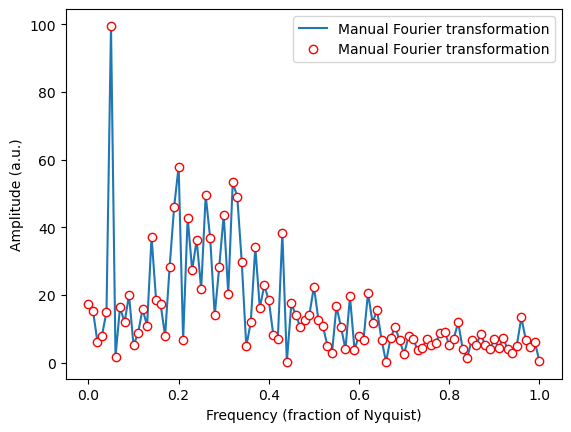

In [64]:
#calculate hertz
hz = np.linspace(0, 1, int(n/2+1))

plt.plot(hz, np.abs(fc[:len(hz)]), label='Manual Fourier transformation')
plt.plot(hz, np.abs(fc2[:len(hz)]), 'ro',
         markerfacecolor='white', 
         label='Manual Fourier transformation')
plt.legend()
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()